## Inaugural Project

## Question 1


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# We define the fixed Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
N = 75 # Grid size for the plot

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility levels
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(1-omega_A1, 1-omega_A2)


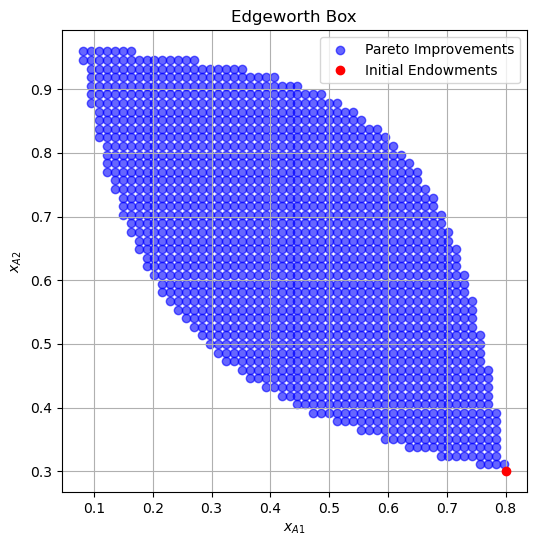

In [41]:
# Edgeworth box
x_A1 = np.linspace(0, 1, N)
x_A2 = np.linspace(0, 1, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

# Calculating utilities
U_A = uA(X_A1, X_A2)
U_B = uB(1-X_A1, 1-X_A2)

# Finding Pareto improvements
pareto_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(X_A1[pareto_mask], X_A2[pareto_mask], color='blue', label='Pareto Improvements', alpha=0.6)
plt.plot(omega_A1, omega_A2, 'ro', label='Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()


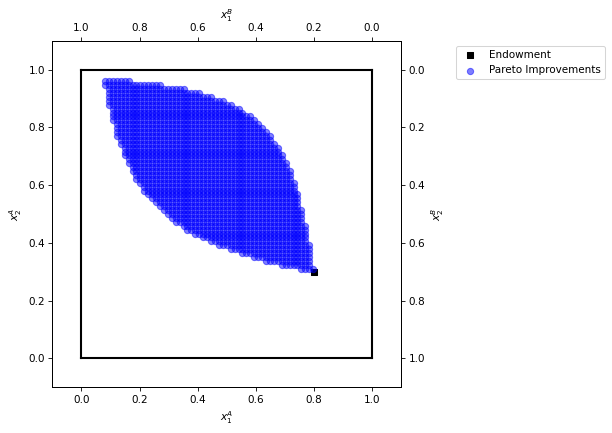

In [17]:
# Jeg skal bruge hjælp til at lave en under fane ude til venstre for følgende ***
# (altså så man bare importere det fra filen).FileNotFoundError *** 

from types import SimpleNamespace

class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3

    def utility_A(self,x1A,x2A):
        pass

    def utility_B(self,x1B,x2B):
        pass

    def demand_A(self,p1):
        pass

    def demand_B(self,p1):
        pass

    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2
    
# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=75)
ax_A = fig.add_subplot(1, 1, 1)
w1bar = 1.0
w2bar = 1.0

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment')

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='blue', alpha=0.5, label='Pareto Improvements')

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.show()


# Question 2

Explain your code and procedure

In [18]:
import numpy as np

# Given parameters
N = 75  # Adjust N for the desired granularity of P1
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
p2 = 1  # Numeraire

# Generating P1 values
P1 = np.linspace(0.5, 2.5, N)

# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1, omega_A2, alpha, p2=1):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1, omega_A2, alpha, p2=1):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_B1, omega_B2, beta, p2=1):
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_B1, omega_B2, beta, p2=1):
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Initialize arrays to store the errors
epsilon_1 = np.zeros(N)
epsilon_2 = np.zeros(N)

# Calculate errors for each p1 in P1
for i, p1 in enumerate(P1):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    
    xA1 = demand_A1(p1, omega_A1, omega_A2, alpha, p2)
    xA2 = demand_A2(p1, omega_A1, omega_A2, alpha, p2)
    xB1 = demand_B1(p1, omega_B1, omega_B2, beta, p2)
    xB2 = demand_B2(p1, omega_B1, omega_B2, beta, p2)
    
    # Calculate market clearing errors for goods 1 and 2
    epsilon_1[i] = xA1 + xB1 - 1
    epsilon_2[i] = xA2 + xB2 - 1

# Display results (or process them further as needed)
for p1, e1, e2 in zip(P1, epsilon_1, epsilon_2):
    print(f"p1 = {p1:.2f}, epsilon_1 = {e1:.4f}, epsilon_2 = {e2:.4f}")


p1 = 0.50, epsilon_1 = 0.5333, epsilon_2 = -0.2667
p1 = 0.53, epsilon_1 = 0.4752, epsilon_2 = -0.2505
p1 = 0.55, epsilon_1 = 0.4228, epsilon_2 = -0.2342
p1 = 0.58, epsilon_1 = 0.3752, epsilon_2 = -0.2180
p1 = 0.61, epsilon_1 = 0.3319, epsilon_2 = -0.2018
p1 = 0.64, epsilon_1 = 0.2922, epsilon_2 = -0.1856
p1 = 0.66, epsilon_1 = 0.2558, epsilon_2 = -0.1694
p1 = 0.69, epsilon_1 = 0.2222, epsilon_2 = -0.1532
p1 = 0.72, epsilon_1 = 0.1912, epsilon_2 = -0.1369
p1 = 0.74, epsilon_1 = 0.1624, epsilon_2 = -0.1207
p1 = 0.77, epsilon_1 = 0.1357, epsilon_2 = -0.1045
p1 = 0.80, epsilon_1 = 0.1107, epsilon_2 = -0.0883
p1 = 0.82, epsilon_1 = 0.0874, epsilon_2 = -0.0721
p1 = 0.85, epsilon_1 = 0.0656, epsilon_2 = -0.0559
p1 = 0.88, epsilon_1 = 0.0451, epsilon_2 = -0.0396
p1 = 0.91, epsilon_1 = 0.0259, epsilon_2 = -0.0234
p1 = 0.93, epsilon_1 = 0.0077, epsilon_2 = -0.0072
p1 = 0.96, epsilon_1 = -0.0094, epsilon_2 = 0.0090
p1 = 0.99, epsilon_1 = -0.0256, epsilon_2 = 0.0252
p1 = 1.01, epsilon_1 = -0.0409,

# Question 3

Explain your code and procedure

In [23]:
import numpy as np
from scipy.optimize import minimize_scalar

# Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
p2 = 1  # Numeraire, fixed at 1

# Utility functions are not directly needed for calculating the market clearing price,
# but they are important for understanding the optimization context.

# Demand functions for consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  # Calculated based on A's endowment
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Function to calculate total market clearing error
def market_clearing_error(p1):
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    xB1 = demand_B1(p1)
    xB2 = demand_B2(p1)
    
    # Market clearing conditions for both goods
    error = abs(xA1 + xB1 - 1) + abs(xA2 + xB2 - 1)
    return error

# Use minimize_scalar to find the p1 that minimizes the market clearing error
result = minimize_scalar(market_clearing_error, bounds=(0.01, 5), method='bounded')

# Display the results
market_clearing_p1 = result.x if result.success else None
market_clearing_p1


0.9444459400418668

In [22]:
 # Find p1 with the smallest sum of absolute errors
total_errors = np.abs(epsilon_1) + np.abs(epsilon_2)
min_error_index = np.argmin(total_errors)
market_clearing_p1 = P1[min_error_index]

print(f"Market clearing p1: {market_clearing_p1:.2f}")


Market clearing p1: 0.93


# Question 4.a

In [25]:
from scipy.optimize import minimize_scalar

# Given parameters and functions are already defined in previous cells.

# Generate P1 values within the specified range
N = 75  # Granularity
P1 = np.linspace(0.5, 2.5, N)

# Utility function for consumer A
def utility_A(p1):
    xA1, xA2 = demand_A1(p1), demand_A2(p1)
    return (xA1**alpha) * (xA2**(1-alpha))

# Find the p1 in P1 that maximizes A's utility
best_utility = -np.inf
best_p1 = None

for p1 in P1:
    current_utility = utility_A(p1)
    if current_utility > best_utility:
        best_utility = current_utility
        best_p1 = p1

# Calculate the optimal demands for A and B at the best_p1
xA1_optimal, xA2_optimal = demand_A1(best_p1), demand_A2(best_p1)
xB1_optimal, xB2_optimal = demand_B1(best_p1), demand_B2(best_p1)

best_p1, xA1_optimal, xA2_optimal, xB1_optimal, xB2_optimal


(2.5,
 0.30666666666666664,
 1.5333333333333334,
 0.3199999999999999,
 0.39999999999999997)

In [26]:
from scipy.optimize import minimize

# Function to calculate utility for consumer A given p1, taking into account B's consumption
def utility_A_given_B_consumption(p1):
    if p1 <= 0:
        return -np.inf  # Ensure p1 is positive
    xB1, xB2 = demand_B1(p1[0]), demand_B2(p1[0])  # Calculate B's demands
    xA1, xA2 = 1 - xB1, 1 - xB2  # A's allocation is what's left after B's consumption
    return -u_A(xA1, xA2)  # Return negative utility for minimization

# Optimization to find the optimal p1 that maximizes A's utility
opt_result = minimize(utility_A_given_B_consumption, [1], bounds=[(0.01, None)])

if opt_result.success:
    optimal_p1_4b = opt_result.x[0]
    # Calculate optimal demands for B at the found p1
    xB1_optimal, xB2_optimal = demand_B1(optimal_p1_4b), demand_B2(optimal_p1_4b)
    # Calculate A's optimal allocation given B's optimal demands
    xA1_optimal_4b, xA2_optimal_4b = 1 - xB1_optimal, 1 - xB2_optimal
else:
    optimal_p1_4b, xA1_optimal_4b, xA2_optimal_4b = None, None, None

optimal_p1_4b, xA1_optimal_4b, xA2_optimal_4b



(1.8992872013440087, 0.6209604531269581, 0.6400475199103994)

# Question 5.a

In [34]:
# Antag at u_A og u_B allerede er defineret som forbrugernes nyttefunktioner.
# Vi har brug for at beregne B's oprindelige nytte for at bruge som en baseline.
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
B_original_utility = u_B(omega_B1, omega_B2, beta)

# Mål funktion: A's nytte, som vi ønsker at maksimere.
def objective(x):
    return -u_A(x[0], x[1], alpha)  # Vi minimerer den negative værdi for at maksimere A's nytte.

# Begrænsninger sikrer, at B ikke er værre stillet.
def constraint1(x):
    return u_B(1 - x[0], 1 - x[1], beta) - B_original_utility

# Startgæt
x0 = [omega_A1, omega_A2]

# Begrænsninger formuleret for `minimize` funktionen.
cons = [{'type':'ineq', 'fun': constraint1}]

# Variablers grænser: xA1 og xA2 kan ikke være negative eller mere end 1.
bounds = [(0, 1), (0, 1)]

# Udfør optimeringen.
sol = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if sol.success:
    optimal_xA1, optimal_xA2 = sol.x
    print(f"Optimal allocation for A: xA1 = {optimal_xA1:.4f}, xA2 = {optimal_xA2:.4f}")
else:
    print("Optimization failed.")

Optimal allocation for A: xA1 = 0.5757, xA2 = 0.8444


In [28]:
# Antag at u_A, u_B, demand_A1, demand_A2, demand_B1, og demand_B2 er defineret som tidligere.

# Beregn B's oprindelige nytte for at sætte en baseline.
B_original_utility = u_B(omega_B1, omega_B2, beta)

# Mål funktion: A's nytte, som vi ønsker at maksimere.
def objective(x):
    return -u_A(x[0], x[1], alpha)  # Vi minimerer den negative værdi for at maksimere.

# Begrænsning sikrer, at B ikke er værre stillet end oprindeligt.
def constraint1(x):
    return u_B(1 - x[0], 1 - x[1], beta) - B_original_utility

# Startgæt baseret på A's oprindelige allokering.
x0 = [omega_A1, omega_A2]

# Definer begrænsningerne for optimeringen.
cons = [{'type':'ineq', 'fun': constraint1}]

# Variablers grænser: xA1 og xA2 kan ikke være negative eller mere end 1.
bounds = [(0, 1), (0, 1)]

# Udfør optimeringen med de definerede begrænsninger og variabelgrænser.
sol = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if sol.success:
    optimal_xA1, optimal_xA2 = sol.x
    print(f"Optimal allocation for A without further restrictions: xA1 = {optimal_xA1:.4f}, xA2 = {optimal_xA2:.4f}")
else:
    print("Optimization failed.")


Optimal allocation for A without further restrictions: xA1 = 0.5757, xA2 = 0.8444


# Question 6.a

In [29]:
def aggregate_utility(x):
    # x[0] og x[1] repræsenterer forbrug af god 1 og god 2 for A.
    xA1, xA2 = x[0], x[1]
    xB1, xB2 = 1 - xA1, 1 - xA2  # Resten går til B.
    return -(u_A(xA1, xA2, alpha) + u_B(xB1, xB2, beta))  # Minimer negativ værdi for at maksimere.

# Optimér for at finde den allokering, der maksimerer den samlede nytte.
sol_6a = minimize(aggregate_utility, x0, bounds=bounds)

if sol_6a.success:
    optimal_xA1_6a, optimal_xA2_6a = sol_6a.x
    optimal_xB1_6a, optimal_xB2_6a = 1 - optimal_xA1_6a, 1 - optimal_xA2_6a
    print(f"Optimal allocation for 6.a: A: xA1 = {optimal_xA1_6a:.4f}, xA2 = {optimal_xA2_6a:.4f}; B: xB1 = {optimal_xB1_6a:.4f}, xB2 = {optimal_xB2_6a:.4f}")
else:
    print("Optimization failed for 6.a.")


Optimal allocation for 6.a: A: xA1 = 0.3333, xA2 = 0.6667; B: xB1 = 0.6667, xB2 = 0.3333


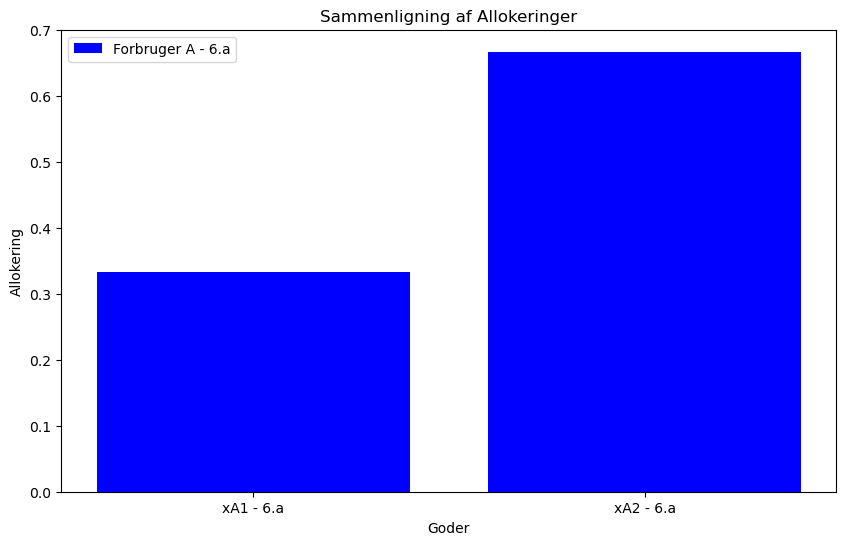

In [30]:
# Antag at vi har gemt de optimale allokeringer fra tidligere opgaver i variabler.
# For eksempel: optimal_xA1_previous, optimal_xA2_previous osv.

# Plot allokeringer for A og B fra 6.a og sammenlign med tidligere resultater.
plt.figure(figsize=(10, 6))

# Allokeringer for A
plt.bar(['xA1 - 6.a', 'xA2 - 6.a'], [optimal_xA1_6a, optimal_xA2_6a], color='blue', label='Forbruger A - 6.a')
# Tilføj tidligere resultater for sammenligning...

plt.xlabel('Goder')
plt.ylabel('Allokering')
plt.title('Sammenligning af Allokeringer')
plt.legend()
plt.show()

# Questions 7.a

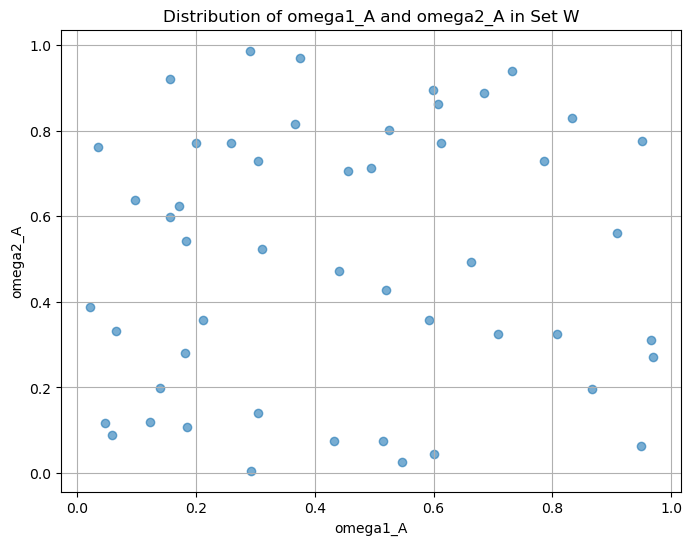

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility
W_omega1_A = np.random.uniform(0, 1, 50)
W_omega2_A = np.random.uniform(0, 1, 50)

# Plot W to visualize the distribution of omega1_A and omega2_A
plt.figure(figsize=(8, 6))
plt.scatter(W_omega1_A, W_omega2_A, alpha=0.6)
plt.title('Distribution of omega1_A and omega2_A in Set W')
plt.xlabel('omega1_A')
plt.ylabel('omega2_A')
plt.grid(True)
plt.show()


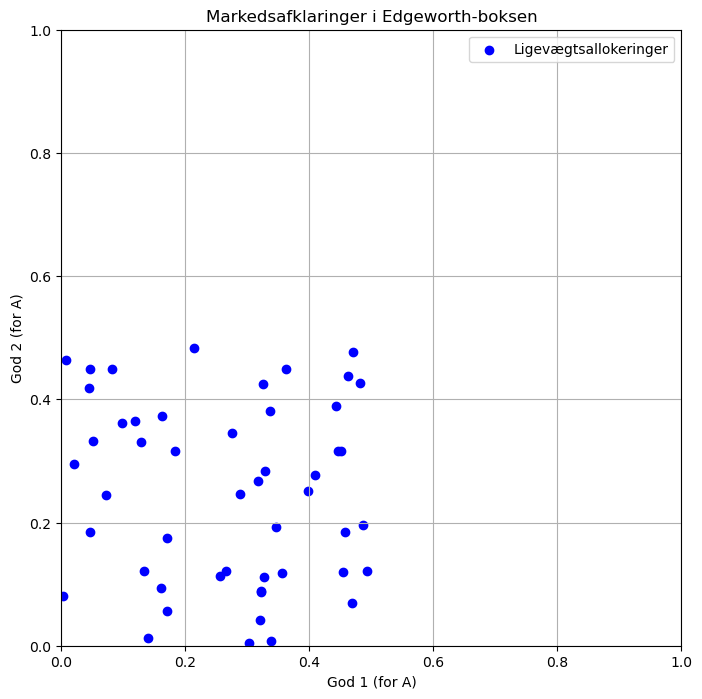

In [33]:
# Antag at equilibrium_allocations er en liste af tuples, hvor hvert tuple er (xA1, xA2) for en ligevægtsallokering.
# For eksempelvis demonstration, genererer vi nogle tilfældige data:
equilibrium_allocations = [(np.random.uniform(0, 0.5), np.random.uniform(0, 0.5)) for _ in range(50)]

# Udtræk xA1 og xA2 værdier for at plotte
xA1_values, xA2_values = zip(*equilibrium_allocations)

# Plot i en Edgeworth-boks
plt.figure(figsize=(8, 8))
plt.scatter(xA1_values, xA2_values, color='blue', label='Ligevægtsallokeringer')
plt.title('Markedsafklaringer i Edgeworth-boksen')
plt.xlabel('God 1 (for A)')
plt.ylabel('God 2 (for A)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

